In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/iris.csv")

In [7]:
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [8]:
df.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,2.4,Virginica
141,6.9,3.1,5.1,2.3,Virginica
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [9]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [13]:
X = df.iloc[:,0:4].values
y = df.iloc[:, -1].values


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
feature_cols = ['sepal.length','sepal.width','petal.length','petal.width']

In [16]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
def InfoGain(data,split_attribute_name,target_name="class"):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [17]:
entropy(y)

1.584962500721156

In [ ]:
df.iloc[:,:4].columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [18]:
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
find_entropy(df)

1.584962500721156

In [19]:
eps = np.finfo(float).eps
from numpy import log2 as log
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

In [20]:
def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
find_winner(df)

'petal.length'

In [21]:
node = find_winner(df)
value=5
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)
print(get_subtable(df,node,value))



   sepal.length  sepal.width  petal.length  petal.width     variety
0           6.7          3.0           5.0          1.7  Versicolor
1           5.7          2.5           5.0          2.0   Virginica
2           6.0          2.2           5.0          1.5   Virginica
3           6.3          2.5           5.0          1.9   Virginica


In [22]:
#TREEE USING DICTIONARY
from pprint import pprint
def buildTree(df,tree=None): 
    Class = df.keys()[-1]   
    node = find_winner(df)
    attValue = np.unique(df[node])
    if tree is None:                    
        tree={}
        tree[node] = {}
    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[df.columns[-1]],return_counts=True)                        
        
        if len(counts)==1:
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable)  
                   
    return tree

In [23]:
tree=buildTree(df)
pprint(tree)

{'petal.length': {1.0: 'Setosa',
                  1.1: 'Setosa',
                  1.2: 'Setosa',
                  1.3: 'Setosa',
                  1.4: 'Setosa',
                  1.5: 'Setosa',
                  1.6: 'Setosa',
                  1.7: 'Setosa',
                  1.9: 'Setosa',
                  3.0: 'Versicolor',
                  3.3: 'Versicolor',
                  3.5: 'Versicolor',
                  3.6: 'Versicolor',
                  3.7: 'Versicolor',
                  3.8: 'Versicolor',
                  3.9: 'Versicolor',
                  4.0: 'Versicolor',
                  4.1: 'Versicolor',
                  4.2: 'Versicolor',
                  4.3: 'Versicolor',
                  4.4: 'Versicolor',
                  4.5: {'sepal.length': {4.9: 'Virginica',
                                         5.4: 'Versicolor',
                                         5.6: 'Versicolor',
                                         5.7: 'Versicolor',
                    

In [24]:
#alternative
def Entropy(ns):
	entropy = 0.0
	total = sum(ns)
	for x in ns:
		entropy += -1.0*x/total*math.log(1.0*x/total,2)
	return entropy

In [27]:
numSamples=df.count(axis=0).sum()
numSamples


750

In [29]:
import math
class C45:

	"""Creates a decision tree with C4.5 algorithm"""
	def __init__(self, pathToData,pathToNames):
		self.filePathToData = pathToData
		self.filePathToNames = pathToNames
		self.data = []
		self.classes = []
		self.numAttributes = -1 
		self.attrValues = {}
		self.attributes = []
		self.tree = None
    

	def fetchData(self):
		with open(self.filePathToNames, "r") as file:
			classes = file.readline()
			self.classes = [x.strip() for x in classes.split(",")]
			#add attributes
			for line in file:
				[attribute, values] = [x.strip() for x in line.split(":")]
				values = [x.strip() for x in values.split(",")]
				self.attrValues[attribute] = values
		self.numAttributes = len(self.attrValues.keys())
		self.attributes = list(self.attrValues.keys())
		with open(self.filePathToData, "r") as file:
			for line in file:
				row = [x.strip() for x in line.split(",")]
				if row != [] or row != [""]:
					self.data.append(row)

	def preprocessData(self):
		for index,row in enumerate(self.data):
			for attr_index in range(self.numAttributes):
				if(not self.isAttrDiscrete(self.attributes[attr_index])):
					self.data[index][attr_index] = float(self.data[index][attr_index])

	def printTree(self):
		print(self.printNode(self.tree))

	def printNode(self, node, indent=""):
		if not node.isLeaf:
			if node.threshold is None:
				#discrete
				for index,child in enumerate(node.children):
					if child.isLeaf:
						print(indent + node.label + " = " + attributes[index] + " : " + child.label)
					else:
						print(indent + node.label + " = " + attributes[index] + " : ")
						self.printNode(child, indent + "	")
			else:
				#numerical
				leftChild = node.children[0]
				rightChild = node.children[1]
				if leftChild.isLeaf:
					print(indent + node.label + " <= " + str(node.threshold) + " : " + leftChild.label)
				else:
					print(indent + node.label + " <= " + str(node.threshold)+" : ")
					self.printNode(leftChild, indent + "	")

				if rightChild.isLeaf:
					print(indent + node.label + " > " + str(node.threshold) + " : " + rightChild.label)
				else:
					print(indent + node.label + " > " + str(node.threshold) + " : ")
					self.printNode(rightChild , indent + "	")



	def generateTree(self):
		self.tree = self.recursiveGenerateTree(self.data, self.attributes)

	def recursiveGenerateTree(self, curData, curAttributes):
		allSame = self.allSameClass(curData)

		if len(curData) == 0:
			#Fail
			return Node(True, "Fail", None)
		elif allSame is not False:
			#return a node with that class
			return Node(True, allSame, None)
		elif len(curAttributes) == 0:
			#return a node with the majority class
			majClass = self.getMajClass(curData)
			return Node(True, majClass, None)
		else:
			(best,best_threshold,splitted) = self.splitAttribute(curData, curAttributes)
			remainingAttributes = curAttributes[:]
			remainingAttributes.remove(best)
			node = Node(False, best, best_threshold)
			node.children = [self.recursiveGenerateTree(subset, remainingAttributes) for subset in splitted]
			return node

	def getMajClass(self, curData):
		freq = [0]*len(self.classes)
		for row in curData:
			index = self.classes.index(row[-1])
			freq[index] += 1
		maxInd = (freq.index(max(freq)))
		return self.classes[maxInd]


	def allSameClass(self, data):
		for row in data:
			if row[-1] != data[0][-1]:
				return False
		return data[0][-1]

	def isAttrDiscrete(self, attribute):
		if attribute not in self.attributes:
			raise ValueError("Attribute not listed")
		elif len(self.attrValues[attribute]) == 1 and self.attrValues[attribute][0] == "continuous":
			return False
		else:
			return True

	def splitAttribute(self, curData, curAttributes):
		splitted = []
		maxEnt = -1*float("inf")
		best_attribute = -1
		#None for discrete attributes, threshold value for continuous attributes
		best_threshold = None
		for attribute in curAttributes:
			indexOfAttribute = self.attributes.index(attribute)
			if self.isAttrDiscrete(attribute):
				#split curData into n-subsets, where n is the number of 
				#different values of attribute i. Choose the attribute with
				#the max gain
				valuesForAttribute = self.attrValues[attribute]
				subsets = [[] for a in valuesForAttribute]
				for row in curData:
					for index in range(len(valuesForAttribute)):
						if row[i] == valuesForAttribute[index]:
							subsets[index].append(row)
							break
				e = gain(curData, subsets)
				if e > maxEnt:
					maxEnt = e
					splitted = subsets
					best_attribute = attribute
					best_threshold = None
			else:
				#sort the data according to the column.Then try all 
				#possible adjacent pairs. Choose the one that 
				#yields maximum gain
				curData.sort(key = lambda x: x[indexOfAttribute])
				for j in range(0, len(curData) - 1):
					if curData[j][indexOfAttribute] != curData[j+1][indexOfAttribute]:
						threshold = (curData[j][indexOfAttribute] + curData[j+1][indexOfAttribute]) / 2
						less = []
						greater = []
						for row in curData:
							if(row[indexOfAttribute] > threshold):
								greater.append(row)
							else:
								less.append(row)
						e = self.gain(curData, [less, greater])
						if e >= maxEnt:
							splitted = [less, greater]
							maxEnt = e
							best_attribute = attribute
							best_threshold = threshold
		return (best_attribute,best_threshold,splitted)

	def gain(self,unionSet, subsets):
		#input : data and disjoint subsets of it
		#output : information gain
		S = len(unionSet)
		#calculate impurity before split
		impurityBeforeSplit = self.entropy(unionSet)
		#calculate impurity after split
		weights = [len(subset)/S for subset in subsets]
		impurityAfterSplit = 0
		for i in range(len(subsets)):
			impurityAfterSplit += weights[i]*self.entropy(subsets[i])
		#calculate total gain
		totalGain = impurityBeforeSplit - impurityAfterSplit
		return totalGain

	def entropy(self, dataSet):
		S = len(dataSet)
		if S == 0:
			return 0
		num_classes = [0 for i in self.classes]
		for row in dataSet:
			classIndex = list(self.classes).index(row[-1])
			num_classes[classIndex] += 1
		num_classes = [x/S for x in num_classes]
		ent = 0
		for num in num_classes:
			ent += num*self.log(num)
		return ent*-1


	def log(self, x):
		if x == 0:
			return 0
		else:
			return math.log(x,2)

class Node:
	def __init__(self,isLeaf, label, threshold):
		self.label = label
		self.threshold = threshold
		self.isLeaf = isLeaf
		self.children = []


In [30]:
import pdb
c1 = C45("/content/iris.data", "/content/iris.names")
c1.fetchData()
c1.preprocessData()
#b=c1.recursiveGenerateTree(c1.data,c1.attributes)
#c=c1.printTree()
#c1.generateTree()
#c1.getMajClass(c1.data)
#c1.printNode(b)
c1.allSameClass(c1.data)
#c1.isAttrDiscrete(c1.attributes)
c1.splitAttribute(c1.data,c1.attributes)
x=c1.splitAttribute(c1.data,c1.attributes)[2]
gain=c1.gain(c1.data,x)
print(gain)

0.9182958340544894


In [31]:
def _find_splits(X, column):
    """
    find all possible split values (threshold),
    by getting unique values in a sorted order
    and finding cutoff point (average) between every two values
    """
    X_unique = np.unique(X[:, column])
    split_values = np.empty(X_unique.shape[0] - 1)
    for i in range(1, X_unique.shape[0]):
        average = (X_unique[i - 1] + X_unique[i]) / 2
        split_values[i - 1] = average

    return split_values
def _compute_entropy(split):
    """entropy score using a fix log base 2"""
    _, counts = np.unique(split, return_counts = True)
    p = counts / split.shape[0]
    entropy = -np.sum(p * np.log2(p))
    return entropy
  
def _compute_splits_entropy(y, splits):
    """compute the entropy for the splits (the two child nodes)"""
    splits_entropy = 0
    for split in splits:
        splits_entropy += (split.shape[0] / y.shape[0]) * _compute_entropy(split)

    return splits_entropy

def _split(X, y, column, value, return_X = True):
    """split the response column using the cutoff threshold"""
    left_mask = X[:, column] <= value
    right_mask = X[:, column] > value
    left_y, right_y = y[left_mask], y[right_mask]

    if not return_X:
        return left_y, right_y
    else:
        left_X, right_X = X[left_mask], X[right_mask]
        return left_X, right_X, left_y, right_y


parent_entropy = _compute_entropy(y_train)
max_features = None
if max_features is None or max_features > X_train.shape[1]:
   max_features = X_train.shape[1]
subset = np.random.choice(X_train.shape[1], max_features, replace = False)
for column in subset:
  split_values = _find_splits(X_train, column)
  ct_gain=[]
  for value in split_values:
    splits = _split(X_train, y_train, column, value, return_X = False)
    gain = parent_entropy - _compute_splits_entropy(y_train, splits)
    ct_gain.append(gain)
print(_compute_splits_entropy(y_train, splits))







1.567674341415934


In [36]:
for i in ct_gain:
  max_gain=i
  if max_gain<i:
    max_gain=i
  else:
    max_gain=max_gain
print(max_gain)

0.013045372426276014


In [37]:
GAIN_RATIO=max/_compute_splits_entropy(y_train, splits)
GAIN_RATIO

0.00832148111481709

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [39]:
#print('classification distribution: ', np.bincount(y_pred))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=10)

#Train score
print(f'model accuracy on train set: {classifier.score(X_train, y_train)}')
#Test score
print(f'model accuracy on test set: {classifier.score(X_test, y_test)}')


model accuracy on train set: 1.0
model accuracy on test set: 0.9736842105263158


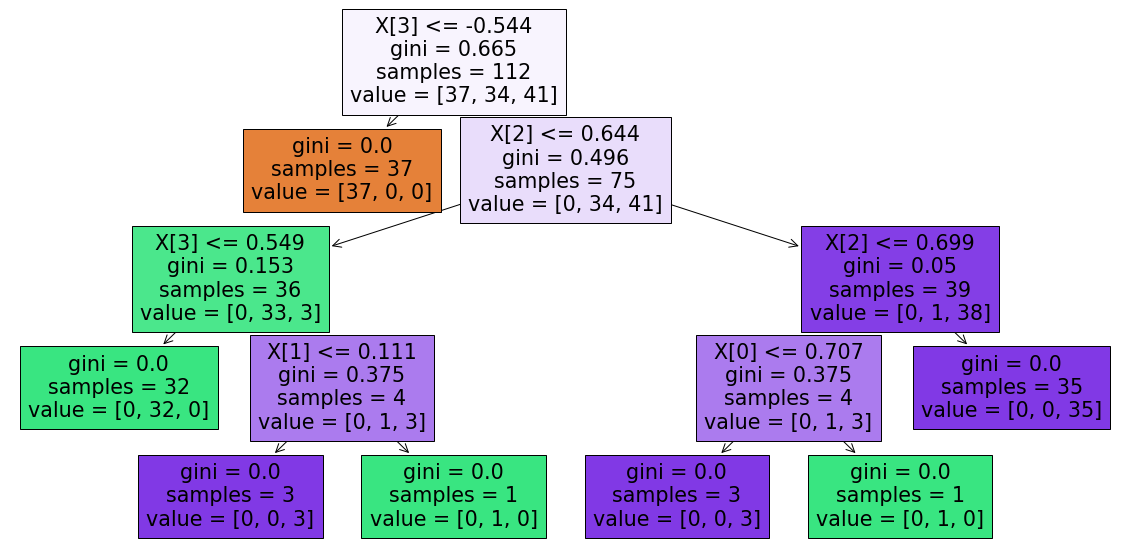

In [40]:
#Apply the decision tree classifier model to the data using all four parameters at once.
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_all_params = DecisionTreeClassifier().fit(X_train,y_train)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()